# 1. 복습하기

* 실제값과 회귀 모델의 차이에 따른 오류값을 ( 오류(error) 또는 잔차(residual) )라고 부릅니다.

* ( 경사하강법(Gradient Descent) ) : **점진적으로** 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류값이 최소가 되는 W 파라미터를 구하는 방식

* 사이킷런에서 제공하는 선형회귀 알고리즘을 구현한 클래스이름은? ( LinearRegression )

* 회귀 모델 성능 지표 : MAE, MSE, RMSE, MSLE, RMSLE, R-Squared

  * MAE, MSE, RMSE, MSLE, RMSLE : 0에 가까울수록 좋은 모델

  * R-Squared(결정계수) : 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 지표, 1에 가까울수록 좋은 모델

* 머신러닝 회귀의 핵심은 주어진 X값과 y값으로 학습을 통해 최적의 ( 회귀 계수 )를 찾아내는 것입니다.

# 2. 문제 정의 및 데이터 수집

* 문제 정의 : 서울시 따릉이 자전거 대여 수요를 예측해 봅시다.

* 데이터 수집 : [데이콘](https://dacon.io/competitions/open/235576/data)

* 데이터 세트 설명 : 2017년 4월 1일부터, 5월 31일까지 시간별로 서울시 따릉이 대여수와 기상상황 데이터가 제공됨

  * train.csv : 서울시 마포구의 날짜별, 시간별 기상상황과 따릉이 대여 수 (기간: 2017년 4월, 5월)
  * test.csv : count 외에는 train 데이터와 동일
  * submission.csv : submission 파일 예시

* 컬럼 설명

  * id: 고유 id
  * hour : 시간
  * temperature : 기온
  * precipitation : 비가 오지 않았으면 0, 비가 왔으면 1
  * windspeed : 풍속(평균)
  * humidity : 습도
  * visibility : 시정, 시계
  * ozone : 오존
  * pm10 : 미세먼지(대)
  * pm2.5 : 미세먼지(소)
  * count : 시간에 따른 따릉이 대여수

* 성능 지표 : RMSE

In [ ]:
# 데이터 가져오기
import numpy as np
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/datasets/서울시_따릉이/train.csv', index_col='id')
test_df = pd.read_csv('/content/drive/MyDrive/datasets/서울시_따릉이/test.csv', index_col='id')

train_df.shape, test_df.shape

((1459, 10), (715, 9))

In [ ]:
# 데이터 확인하기
train_df.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,,,,,,,,,,
3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
# 열 정보 보기
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 3 to 2179
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1457 non-null   float64
 2   hour_bef_precipitation  1457 non-null   float64
 3   hour_bef_windspeed      1450 non-null   float64
 4   hour_bef_humidity       1457 non-null   float64
 5   hour_bef_visibility     1457 non-null   float64
 6   hour_bef_ozone          1383 non-null   float64
 7   hour_bef_pm10           1369 non-null   float64
 8   hour_bef_pm2.5          1342 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 125.4 KB


In [ ]:
test_df.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
id,,,,,,,,,
0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 2177
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    715 non-null    int64  
 1   hour_bef_temperature    714 non-null    float64
 2   hour_bef_precipitation  714 non-null    float64
 3   hour_bef_windspeed      714 non-null    float64
 4   hour_bef_humidity       714 non-null    float64
 5   hour_bef_visibility     714 non-null    float64
 6   hour_bef_ozone          680 non-null    float64
 7   hour_bef_pm10           678 non-null    float64
 8   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 55.9 KB


# 3. 데이터 분석 및 시각화

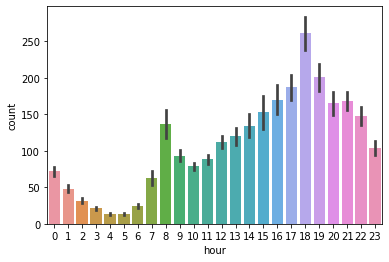

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='hour', y='count', data=train_df)

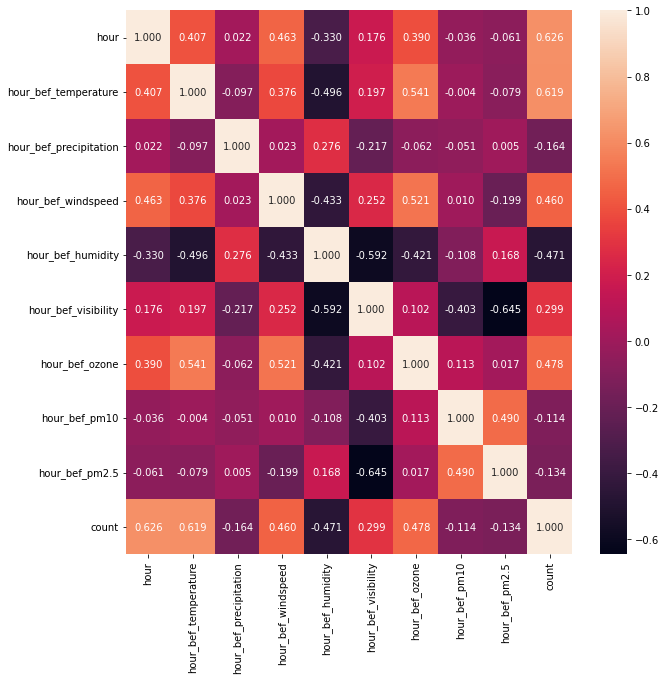

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True, fmt='.3f')

# 3. 데이터 전처리

* 결측치를 평균으로 대체하기

* 보간법으로 결측치 대체하기

  * 따릉이 데이터의 피쳐들은 기상정보들이며 데이터의 순서는 시간 순서임
  * 따라서, 결측치들을 이전 행(직전 시간)과 다음 행(직후 시간)의 평균으로 보간하는 것이 합리적임
  * https://teddylee777.github.io/pandas/pandas-interpolation

In [ ]:
for col in train_df.columns:
  if train_df[col].isnull().sum() > 0:
    train_df.fillna({col: train_df[col].mean()}, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 3 to 2179
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1459 non-null   float64
 2   hour_bef_precipitation  1459 non-null   float64
 3   hour_bef_windspeed      1459 non-null   float64
 4   hour_bef_humidity       1459 non-null   float64
 5   hour_bef_visibility     1459 non-null   float64
 6   hour_bef_ozone          1459 non-null   float64
 7   hour_bef_pm10           1459 non-null   float64
 8   hour_bef_pm2.5          1459 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 165.4 KB


In [ ]:
# 보간법으로 채우기
train_df.interpolate(inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 3 to 2179
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1459 non-null   float64
 2   hour_bef_precipitation  1459 non-null   float64
 3   hour_bef_windspeed      1459 non-null   float64
 4   hour_bef_humidity       1459 non-null   float64
 5   hour_bef_visibility     1459 non-null   float64
 6   hour_bef_ozone          1459 non-null   float64
 7   hour_bef_pm10           1459 non-null   float64
 8   hour_bef_pm2.5          1459 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 125.4 KB


In [ ]:
test_df.interpolate(inplace=True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 2177
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    715 non-null    int64  
 1   hour_bef_temperature    715 non-null    float64
 2   hour_bef_precipitation  715 non-null    float64
 3   hour_bef_windspeed      715 non-null    float64
 4   hour_bef_humidity       715 non-null    float64
 5   hour_bef_visibility     715 non-null    float64
 6   hour_bef_ozone          715 non-null    float64
 7   hour_bef_pm10           715 non-null    float64
 8   hour_bef_pm2.5          715 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 55.9 KB


# 4. 모델 학습 / 예측 / 평가

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# 데이터 나누기
X_data = train_df.drop(['count'], axis=1)
y_data = train_df['count']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [ ]:
# 의사결정트리
dt = DecisionTreeRegressor(criterion='squared_error')

dt.fit(X_train, y_train)
pred = dt.predict(X_test)
pred[:10]

array([  7., 127.,  84.,  62.,  52., 221., 104., 141.,  57.,   8.])

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate(y, pred):
  mse = mean_squared_error(y, pred)
  rmse = np.sqrt(mean_squared_error(y, pred))
  mae = mean_absolute_error(y, pred)

  print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, rmse, mae))

In [ ]:
evaluate(y_test, pred)

MSE: 2653.596, RMSE: 51.513, MAE: 32.418


In [ ]:
# 랜덤 포레스트
rf = RandomForestRegressor(criterion='squared_error', n_estimators=500)

rf.fit(X_train, y_train)
pred = rf.predict(X_test)
pred[:10]

array([ 18.584, 100.352,  97.868,  50.26 ,  77.72 , 195.898, 104.428,
        88.702,  82.584,  13.582])

In [ ]:
evaluate(y_test, pred)

MSE: 1288.976, RMSE: 35.902, MAE: 24.233


In [ ]:
# 선형 회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred[:10]

array([ 33.7878074 , 107.13530478, 125.92276498,  18.62298201,
       128.15165478, 172.78778134, 126.66103443, 118.01289474,
        97.55135323,  24.64255275])

In [ ]:
evaluate(y_test, pred)

MSE: 2553.329, RMSE: 50.530, MAE: 37.929


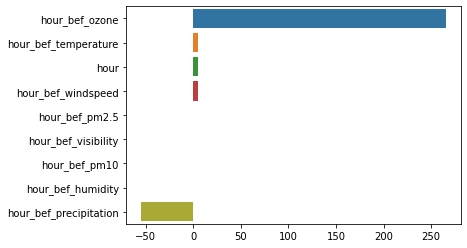

In [ ]:
coef = pd.Series(lr.coef_, index=X_data.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=500)

gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)

evaluate(y_test, pred)

MSE: 1416.069, RMSE: 37.631, MAE: 25.959


In [ ]:
xgr = XGBRegressor(n_estimators=500)

xgr.fit(X_train, y_train)
pred = xgr.predict(X_test)

evaluate(y_test, pred)

[12:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 1436.152, RMSE: 37.897, MAE: 26.624


In [ ]:
lgbm = LGBMRegressor(n_estimators=500)

lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)

evaluate(y_test, pred)

MSE: 1484.280, RMSE: 38.526, MAE: 26.784


# 모델 개선

* 결정트리 기반 모델 : 특성 중요도로 중요한 피처만 학습시키기
* 피처 스케일링 : 성능 좋아지지 않음

In [ ]:
dt.feature_importances_

array([0.59896985, 0.17782933, 0.01912522, 0.0330981 , 0.03804295,
       0.0278471 , 0.03860248, 0.04351018, 0.02297479])

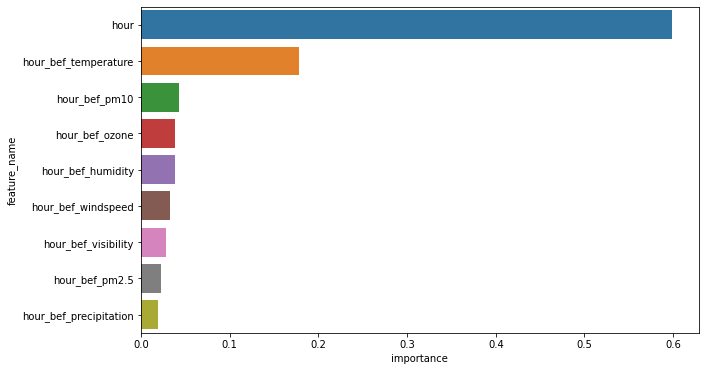

In [ ]:
df2 = pd.DataFrame({
    'feature_name' : test_df.columns,
    'importance' : dt.feature_importances_,
})

df2 = df2.sort_values(by=['importance'], ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=df2['feature_name'], x=df2['importance'])

In [ ]:
rf.feature_importances_

array([0.59310618, 0.17666252, 0.02143431, 0.02863854, 0.04504006,
       0.03065824, 0.04386698, 0.03700666, 0.02358651])

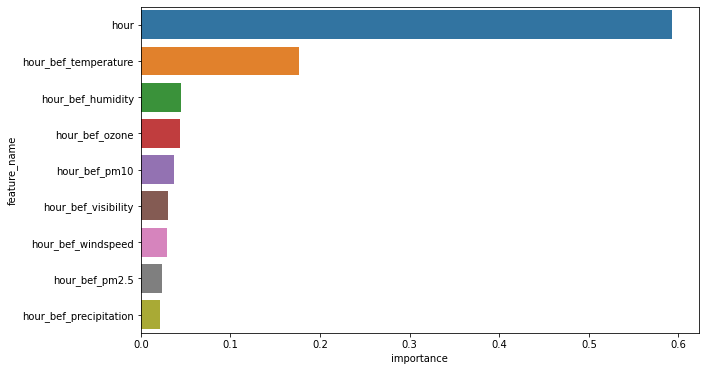

In [ ]:
df3 = pd.DataFrame({
    'feature_name': test_df.columns,
    'importance': rf.feature_importances_
})

df3 = df3.sort_values(by=['importance'], ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y='feature_name', x='importance', data=df3)

In [ ]:
# 중요도가 낮은 피처 2개 삭제 후 다시 학습시켜보기
# hour_bef_precipitation, hour_bef_pm2.5
train_df2 = train_df.drop(['hour_bef_precipitation', 'hour_bef_pm2.5'], axis=1)
train_df2.head()

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,count
id,,,,,,,,
3,20,16.3,1.5,89.0,576.0,0.027,76.0,49.0
6,13,20.1,1.4,48.0,916.0,0.042,73.0,159.0
7,6,13.9,0.7,79.0,1382.0,0.033,32.0,26.0
8,23,8.1,2.7,54.0,946.0,0.040,75.0,57.0
9,18,29.5,4.8,7.0,2000.0,0.057,27.0,431.0


In [ ]:
X_data2 = train_df2.drop(['count'], axis=1)
y_data2 = train_df2['count']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.3, random_state=0)

In [ ]:
test_df2 = test_df.drop(['hour_bef_precipitation', 'hour_bef_pm2.5'], axis=1)
test_df2.head()

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10
id,,,,,,,
0,7,20.7,1.3,62.0,954.0,0.041,44.0
1,17,30.0,5.4,33.0,1590.0,0.061,49.0
2,13,19.0,2.1,95.0,193.0,0.020,36.0
4,6,22.5,2.5,60.0,1185.0,0.027,52.0
5,22,14.6,3.4,93.0,218.0,0.041,18.0


# 피처 스케일링 추가

In [ ]:
X_data3 = train_df.drop(['count'], axis=1)
y_data3 = train_df['count']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ss = StandardScaler()
scaled_X_data = ss.fit_transform(X_data3)
scaled_X_data[:3]

array([[ 1.22919048, -0.07870939,  5.54232725, -0.71187258,  1.80553732,
        -1.4224813 , -0.63661883,  0.58888901,  0.16939871],
       [ 0.21769081,  0.64701917, -0.18042962, -0.78449842, -0.20864398,
        -0.83897101,  0.14181469,  0.49322692,  0.65124498],
       [-0.79380886, -0.53706427, -0.18042962, -1.29287928,  1.31427359,
        -0.03921868, -0.32524542, -0.81415498, -0.79429383]])

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(scaled_X_data, y_data3, test_size=0.3, random_state=0)

In [ ]:
X_train3[:2], X_test3[:2]

(array([[ 0.94019058,  1.54463082, -0.18042962,  0.81327   , -0.94553958,
         -0.24516348,  2.32142853,  1.76872146,  1.27076162],
        [ 1.51819039,  0.30325301, -0.18042962, -1.07500177, -0.74903409,
         -0.74629585, -0.37714099,  3.55441382,  0.51357462]]),
 array([[-1.22730871, -0.88083043, -0.18042962,  0.52276665,  1.60903182,
         -1.245712  ,  0.19371026, -0.11263299, -0.65662347],
        [ 0.94019058, -1.16730223, -0.18042962,  0.59539249,  1.51077908,
         -0.50945932, -0.63661883, -0.84604235, -0.10594202]]))

In [ ]:
# Grid Search 적용해보기
from sklearn.model_selection import GridSearchCV

# 파라미터 정의 (딕셔너리)
params = {'n_estimators': [500, 600, 700],
          'max_depth': [9, 10, 11, 12],
          'min_samples_split': [2, 3, 4]}

rf = RandomForestRegressor(random_state=0)

# GridSearchCV 객체 생성 (cv 매개변수 기본값 5)
gs = GridSearchCV(rf, param_grid=params, n_jobs=-1)  # 모든 CPU 코어 사용
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [500, 600, 700]})

In [ ]:
gs.best_params_

{'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 500}

In [ ]:
gs.score(X_test, y_test)

0.8004697970934208

In [ ]:
scaled_test = ss.transform(test_df)
scaled_test[:3]

array([[-0.6493089 ,  0.76160789, -0.18042962, -0.85712426,  0.47912524,
        -0.77375515,  0.08991912, -0.43150662, -0.24361238],
       [ 0.79569062,  2.53773306, -0.18042962,  2.12053507, -0.94553958,
         0.31775232,  1.12783048, -0.2720698 ,  0.37590426],
       [ 0.21769081,  0.43693985,  5.54232725, -0.27611756,  2.10029556,
        -2.07978847, -0.9998878 , -0.68660553, -0.1747772 ]])

In [ ]:
best = gs.best_estimator_
pred = best.predict(test_df)
pred[:10]

array([105.04677769, 204.34957056,  96.85340142,  28.87819499,
        73.55777778, 121.17111048, 178.96827097, 305.823     ,
        37.35952078, 119.0713    ])

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/datasets/서울시_따릉이/submission.csv')
submission['id2'] = test_df.index
submission['count'] = pred
submission.to_csv('/content/drive/MyDrive/datasets/서울시_따릉이/my_submission.csv', index=False)

# 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것입니다.

* L2 규제

  * 각 가중치 제곱의 합에 규제 강도(Regularization Strenth)를 곱하여 오차에 더함

  * 규제 강도를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시 함), 규제 강도를 작게하면 가중치가 증가함 (규제를 중요시하지 않음)

  * 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만듦

* L1 규제

  * 각 가중치의 절대값을 모두 더한 값에 규제 강도(Regularization Strength)를 곱하여 오차에 더함

  * 어떤 가중치(W)는 실제로 0이 되어 모델에서 완전히 제외되는 특성이 생김

  * 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않도록 함, 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불림
  
* L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로 L2 규제가 더 많이 사용됩니다.

* 릿지(Ridge) : 선형 회귀에 L2 규제를 추가한 회귀 모델

* 라쏘(Lasso) : 선형 회귀에 L1 규제를 적용한 회귀 모델

* 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델

In [ ]:
# 릿지
ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

evaluate(y_test, pred)

MSE: 2600.362, RMSE: 50.994, MAE: 38.296


In [ ]:
# 라쏘
lasso = Lasso(alpha=0.01)

lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)

evaluate(y_test, pred)

MSE: 2559.066, RMSE: 50.587, MAE: 37.976


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 값이 커질수록 규제가 커짐
alpha = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]